<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Old-modeling" data-toc-modified-id="Old-modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Old modeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Prepare Data</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#New-test" data-toc-modified-id="New-test-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>New test</a></span></li><li><span><a href="#Old-test" data-toc-modified-id="Old-test-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Old test</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Model</a></span></li></ul></li></ul></li></ul></div>

# Old modeling

### Prepare Data

 

In [37]:
df_performance['sym'].nunique()

2227

```
Date           SYM       Price
01/01/1970     AAPL      3.50
01/01/1970     TSLA      420
01/02/1970     AAPL      3.53
01/02/1970     TSLA      421
```

To

```
Date        SYM    AAPL_Price    SYM     TSLA_Price
01/01/1970  AAPL   3.50     TSLA    420  
01/02/1970  AAPL   3.53     TSLA    421  
```

In [38]:
df_performance.head()

,sym,index,RevenueTTM,TotalCash,ExDividendDate,Dividend,DividendYield,PriceToBook,PriceToSales,EnterpriseValue,...,industry_Transportation Infrastructure,industry_Water Utilities,industry_Wireless Telecommunication Services,Exchange_NASDAQ,Exchange_NYSE,Exchange_OTC,Exchange_unknown,DJIA_1,NASDAQ100_1,SP500_1
date,,,,,,,,,,,,,,,,,,,,,
2019-08-09,A,0,5019.000,2155.000,0,0.164,0.944,4.298,4.402,21670704590.000,...,0,0,0,0,1,0,0,0,0,1
2019-08-12,A,1,5019.000,2155.000,0,0.164,0.956,4.246,4.348,21401262240.000,...,0,0,0,0,1,0,0,0,0,1
2019-08-13,A,2,5019.000,2155.000,0,0.164,0.985,4.121,4.221,20764110330.000,...,0,0,0,0,1,0,0,0,0,1
2019-08-14,A,3,5019.000,2155.000,0,0.164,0.970,4.184,4.285,21084271240.000,...,0,0,0,0,1,0,0,0,0,1
2019-08-15,A,4,5090.000,1765.000,0,0.164,1.000,4.283,4.068,20365900000.000,...,0,0,0,0,1,0,0,0,0,1


> loop by sym,  make diff cols per symbol i.e 'AAPL_total_cash'

In [39]:
all_sym = df_performance['sym'].unique()

In [40]:
df_performance.iloc[0]

sym                       A
index                     0
RevenueTTM         5019.000
TotalCash          2155.000
ExDividendDate            0
                     ...   
Exchange_OTC              0
Exchange_unknown          0
DJIA_1                    0
NASDAQ100_1               0
SP500_1                   1
Name: 2019-08-09 00:00:00, Length: 127, dtype: object

In [41]:
df_performance.index

DatetimeIndex(['2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14',
               '2019-08-15', '2019-08-16', '2019-08-19', '2019-08-20',
               '2019-08-21', '2019-08-22',
               ...
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27'],
              dtype='datetime64[ns]', name='date', length=727152, freq=None)

In [42]:
idx = df_performance.query("sym == 'AAPL'").index
new_dfs = []
symbols_lost = 0
for sym in all_sym:
    sym_df = df_performance.loc[df_performance['sym'] == sym]# change on sort_index
    sym_df.drop('sym', axis=1, inplace=True)
    sym_df.columns = [f"{sym}_{col}" for col in sym_df.columns]
    try:
        sym_df.index = idx
        new_dfs.append(sym_df)
    except ValueError:
        symbols_lost += 1
df = pd.concat(new_dfs, axis=1)
print("symbols lost -> ", symbols_lost)
df.head()

symbols lost ->  174


,A_index,A_RevenueTTM,A_TotalCash,A_ExDividendDate,A_Dividend,A_DividendYield,A_PriceToBook,A_PriceToSales,A_EnterpriseValue,A_PriceToCashFlow,...,ZYXI_industry_Transportation Infrastructure,ZYXI_industry_Water Utilities,ZYXI_industry_Wireless Telecommunication Services,ZYXI_Exchange_NASDAQ,ZYXI_Exchange_NYSE,ZYXI_Exchange_OTC,ZYXI_Exchange_unknown,ZYXI_DJIA_1,ZYXI_NASDAQ100_1,ZYXI_SP500_1
date,,,,,,,,,,,,,,,,,,,,,
2019-08-09,0,5019.000,2155.000,0,0.164,0.944,4.298,4.402,21670704590.000,16.574,...,0,0,0,1,0,0,0,0,0,0
2019-08-12,1,5019.000,2155.000,0,0.164,0.956,4.246,4.348,21401262240.000,16.371,...,0,0,0,1,0,0,0,0,0,0
2019-08-13,2,5019.000,2155.000,0,0.164,0.985,4.121,4.221,20764110330.000,15.892,...,0,0,0,1,0,0,0,0,0,0
2019-08-14,3,5019.000,2155.000,0,0.164,0.970,4.184,4.285,21084271240.000,16.132,...,0,0,0,1,0,0,0,0,0,0
2019-08-15,4,5090.000,1765.000,0,0.164,1.000,4.283,4.068,20365900000.000,16.051,...,0,0,0,1,0,0,0,0,0,0


In [43]:
df.isna().sum().sum()

0

In [44]:
price_columns = [col for col in df.columns if 'price' in col]
len(price_columns)

2053

In [45]:
df.shape

(337, 258678)

In [46]:
drop_cols = [col for col in df.columns if 'index' in col]
df.drop(drop_cols, inplace=True, axis=1)

In [47]:
len(df)

337

In [48]:
df.shape

(337, 256625)

In [49]:
df.index

DatetimeIndex(['2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14',
               '2019-08-15', '2019-08-16', '2019-08-19', '2019-08-20',
               '2019-08-21', '2019-08-22',
               ...
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27'],
              dtype='datetime64[ns]', name='date', length=337, freq=None)

In [50]:
# pickle data
df.to_pickle('./data/model_df.pkl')

## Neural Network

In [95]:
df = pd.read_pickle('./data/modeling/model_df.pkl')

### New test
> **links:**
> * https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
> * https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [96]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    "https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/"
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [97]:
sym_predict='VLO'
col = f'{sym_predict}_price'
df = pd.concat([df[col], df.drop(col, axis=1)], axis=1)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [98]:
df.shape

(337, 256625)

In [99]:
n_days = 3
n_features = 256625

In [100]:
reframed = series_to_supervised(df_scaled, n_days, 1)

values = reframed.values
train = values[:250]
test = values[250:315]
val = values[315:]

n_obs = n_days * n_features
X_train, y_train = train[:, :n_obs], train[:, -n_features]
X_test, y_test = test[:, :n_obs], test[:, -n_features]
X_val, y_val = val[:, :n_obs], val[:, -n_features]

In [101]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((250, 769875), (250,), (65, 769875), (65,), (19, 769875), (19,))

In [102]:
X_train = X_train.reshape((X_train.shape[0], n_days, n_features))
X_test = X_test.reshape((X_test.shape[0], n_days, n_features))

In [103]:
del model
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.9))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.9))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.9))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.9))
model.add(Dense(n_features))
model.compile(loss='mae', optimizer='adam')

# fit network
earlystopping = EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_train, y_train,
                    epochs=2000, batch_size=2048,
                    validation_data=(X_test, y_test),
                    verbose=2, shuffle=False,
                    callbacks=[earlystopping])

Epoch 1/2000


InternalError:    Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 256625, 50, 1, 3, 250, 50] 
	 [[{{node CudnnRNN}}]]
	 [[sequential_6/lstm_6/PartitionedCall]] [Op:__inference_train_function_85097]

Function call stack:
train_function -> train_function -> train_function


In [ ]:
my_loss= history.history['loss']
plt.plot(range(len(my_loss)),my_loss, label='train')
my_val_loss= history.history['val_loss']
plt.plot(range(len(my_loss)),my_val_loss, label='test')
plt.legend()

In [ ]:
model.predict(X_test)

In [59]:
pd.DataFrame(scaler.inverse_transform(model.predict(X_test)), columns=df.columns)[col]

ValueError: operands could not be broadcast together with shapes (65,3) (256625,) (65,3) 

In [ ]:
df.iloc[250:315][col]

In [60]:
# make a prediction
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], n_days*n_features))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: operands could not be broadcast together with shapes (65,10) (256625,) (65,10) 

### Old test

In [80]:
df = pd.read_pickle('./data/modeling/model_df.pkl')
tsla_columns = [col for col in df.columns if "TSLA" in col]
df = df[tsla_columns]

df_train = df.iloc[:250].copy()
df_test = df.iloc[250:].copy()


train_scaler = MinMaxScaler()
df_train_scaled = train_scaler.fit_transform(df_train)
test_scaler = MinMaxScaler()
df_test_scaled = test_scaler.fit_transform(df_test)

X_train = df_train.copy()
y_train = df_train.copy()

X_test = df_test.copy()
y_test = df_test.copy()

n_features = X_train.shape[1]
X_train_reshaped = X_train.values.reshape((len(X_train), 1, n_features))
y_train_reshaped = y_train.values.reshape((len(y_train), 1, n_features))

n_features = X_test.shape[1]
X_test_reshaped = X_test.values.reshape((len(X_test), 1, n_features))
y_test_reshaped = y_test.values.reshape((len(y_test), 1, n_features))

n_input = 4
data_gen = sequence.TimeseriesGenerator(X_train_reshaped, y_train_reshaped, length=n_input)
test_data_gen = sequence.TimeseriesGenerator(X_test_reshaped, y_test_reshaped, length=n_input)

((250, 125), (250, 125), (87, 125), (87, 125))

In [82]:
# n_input=4
# data_gen = sequence.TimeseriesGenerator(X_train, y_train, length=n_input)
# test_data_gen = sequence.TimeseriesGenerator(X_test, y_test, length=n_input)

### Model

In [83]:
X_train_reshaped.shape, y_train_reshaped.shape

((250, 1, 125), (250, 1, 125))

In [91]:
del model
model = Sequential()
model.add(LSTM(134, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [92]:
earlystopping = EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(
    X_train_reshaped, y_train_reshaped,
    steps_per_epoch=len(data_gen),
    batch_size=1,
    epochs=200,
    callbacks=[earlystopping],
    validation_data=(X_test_reshaped, y_test_reshaped),
    shuffle=False
)

Epoch 1/200
2/2 [==============================] - 0s 127ms/step - loss: 863840000.0000 - val_loss: 4230228224.0000
Epoch 2/200
2/2 [==============================] - 0s 50ms/step - loss: 768691200.0000 - val_loss: 3919540992.0000
Epoch 3/200
2/2 [==============================] - 0s 50ms/step - loss: 718672576.0000 - val_loss: 3705048320.0000
Epoch 4/200
2/2 [==============================] - 0s 45ms/step - loss: 704216704.0000 - val_loss: 3556278272.0000
Epoch 5/200
2/2 [==============================] - 0s 49ms/step - loss: 676962432.0000 - val_loss: 3439750656.0000
Epoch 6/200
2/2 [==============================] - 0s 45ms/step - loss: 570149248.0000 - val_loss: 3363866880.0000
Epoch 7/200
2/2 [==============================] - 0s 46ms/step - loss: 528397376.0000 - val_loss: 3306863360.0000
Epoch 8/200
2/2 [==============================] - 0s 46ms/step - loss: 601624576.0000 - val_loss: 3263281920.0000
Epoch 9/200
2/2 [==============================] - 0s 48ms/step - loss: 5557230

2/2 [==============================] - 0s 46ms/step - loss: 423523456.0000 - val_loss: 3075383808.0000
Epoch 142/200
2/2 [==============================] - 0s 45ms/step - loss: 407174976.0000 - val_loss: 3075383808.0000
Epoch 143/200
2/2 [==============================] - 0s 47ms/step - loss: 416944736.0000 - val_loss: 3075383808.0000
Epoch 144/200
2/2 [==============================] - 0s 52ms/step - loss: 421543168.0000 - val_loss: 3075383808.0000
Epoch 145/200
2/2 [==============================] - 0s 49ms/step - loss: 425041184.0000 - val_loss: 3075383808.0000
Epoch 146/200
2/2 [==============================] - 0s 45ms/step - loss: 409801088.0000 - val_loss: 3075383808.0000
Epoch 147/200
2/2 [==============================] - 0s 45ms/step - loss: 413752640.0000 - val_loss: 3075383808.0000
Epoch 148/200
2/2 [==============================] - 0s 45ms/step - loss: 425969856.0000 - val_loss: 3075383808.0000
Epoch 149/200
2/2 [==============================] - 0s 44ms/step - loss: 4297

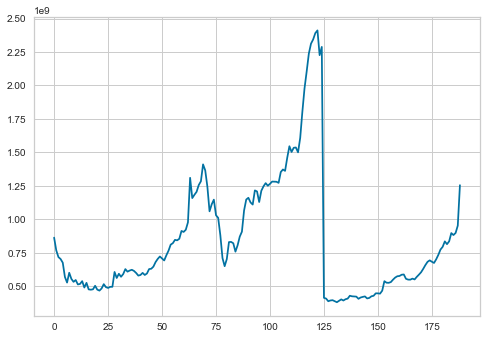

In [93]:
my_loss= history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [94]:
model.predict(X_train)

ValueError: in user code:

    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 125]


In [73]:
# make a prediction
yhat = model.predict(val_X)
val_X = val_X.reshape((val_X.shape[0], val_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, val_X[:, 1:]), axis=1)
print(inv_yhat)
inv_yhat = val_scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = val_y.reshape((len(val_y), 1))
inv_y = np.concatenate((val_y, val_X[:, 1:]), axis=1)
inv_y = val_scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

[[ 8.38025357e-04 -3.59029062e-02 -2.71402113e-02 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 8.38025357e-04 -3.59029062e-02 -2.71402113e-02 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 8.38025357e-04 -3.59029062e-02 -2.71402113e-02 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 8.38025357e-04 -3.59029062e-02 -2.71402113e-02 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 8.38025357e-04 -3.59029062e-02 -2.71402113e-02 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 8.38025357e-04 -3.59029062e-02 -2.71402113e-02 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


ValueError: operands could not be broadcast together with shapes (22,249) (125,) (22,249) 

In [ ]:
first_eval_batch = X_train[n_input:]

In [ ]:
first_eval_batch = first_eval_batch.values.reshape((1,n_input,n_features))

In [74]:
model.predict(data_gen)

ValueError: in user code:

    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\12147\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, None, None, None]


In [75]:
X_train_reshaped.shape

(250, 1, 125)

In [76]:
X_train_reshaped[:,].shape

(250, 1, 125)

In [79]:
input are a sliding window of dating point
TimeSeriesGenerator

can do target is a single stock's price

SyntaxError: invalid syntax (<ipython-input-79-52d99bf5d5d9>, line 1)

In [ ]:

create(df)

> **Future:**
> * Cluster on absolute correlation?  take.corr for different symbols
> * iteratively add columns,  start with only predicting future price of one stock with all the prices previously of other stocks
> * Try w/ without differencing